## Student Performance Indicator !

In [144]:
from pyexpat import features

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv('data/stud.csv')

In [146]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [147]:
df.shape

(1000, 8)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [149]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing data

In [150]:
df.duplicated().sum()

np.int64(0)

In [151]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [152]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring Data

In [153]:
print("Categories in gender variables", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variables", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental level of education variables", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variables", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variables", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variables ['female' 'male']
Categories in race/ethnicity variables ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variables ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variables ['standard' 'free/reduced']
Categories in test preparation course variables ['none' 'completed']


In [154]:
numerical_features = [features for features in df.columns if df[features].dtype != 'object']
cath_data = [features for features in df.columns if df[features].dtype == 'object']

print("Numerical features : ", numerical_features)
print("Categorical features : ", cath_data)

Numerical features :  ['math_score', 'reading_score', 'writing_score']
Categorical features :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


finding total score and average score for every data row !

In [155]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [156]:
reading_top = df[df['reading_score'] == 100]['average'].count()
writing_top = df[df['writing_score'] == 100]['average'].count()
math_top = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in reading : {reading_top}')
print(f'Number of students with full marks in writing : {writing_top}')
print(f'Number of students with full marks in math : {math_top}')

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in math : 7


In [157]:
reading_low = df[df['reading_score'] <= 20]['average'].count()
writing_low = df[df['writing_score'] <= 20]['average'].count()
math_low = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less the 20 marks in reading : {reading_low}')
print(f'Number of students with less the 20 marks in writing : {writing_low}')
print(f'Number of students with less the 20 marks in math : {math_low}')

Number of students with less the 20 marks in reading : 1
Number of students with less the 20 marks in writing : 3
Number of students with less the 20 marks in math : 4


## Insights !
- Students are not performed well in maths
- Best performance is in reading section

### Graphical Way !

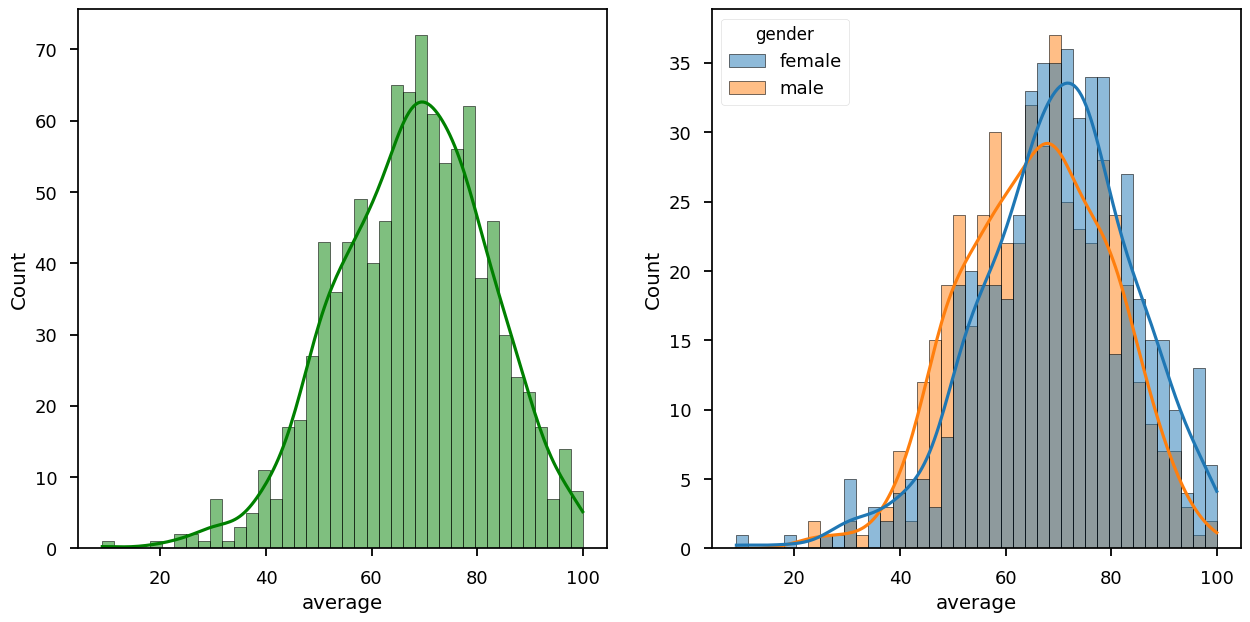

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='average', bins=40, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='average', bins=40, kde=True, hue='gender', color='r')
plt.show()

- Females performa well in terms of average score

<Axes: xlabel='total score', ylabel='Count'>

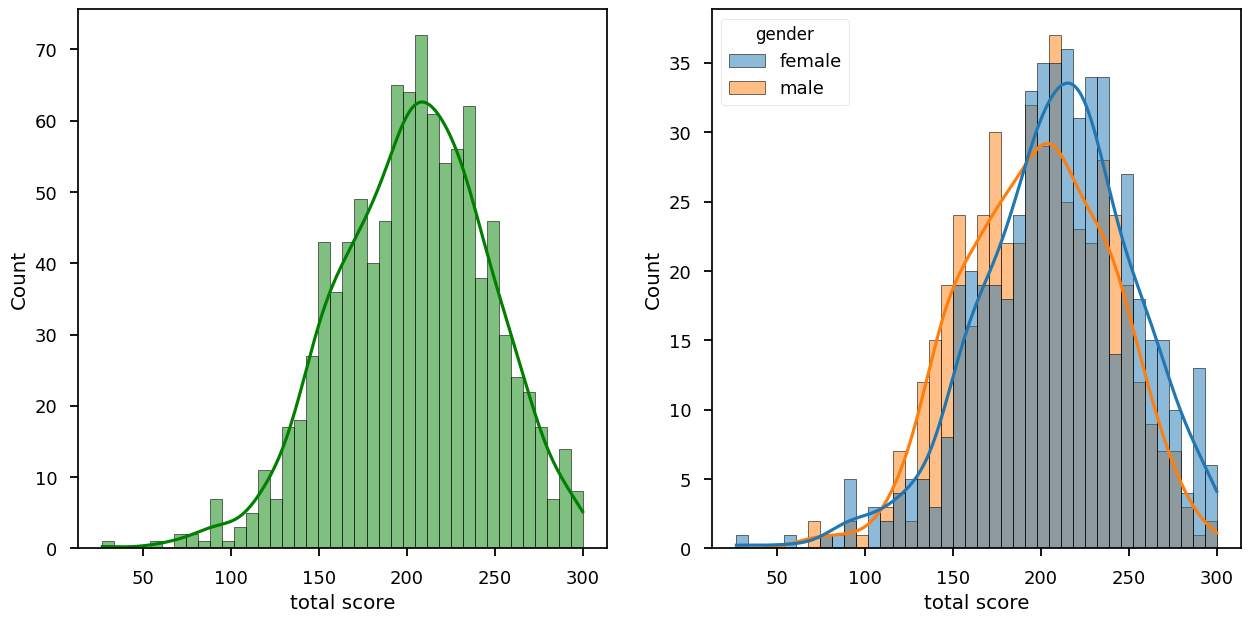

In [159]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total score', bins=40, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total score', bins=40, kde=True, hue='gender', color='g')

- based on total score too, data shows females perform well !

<Axes: xlabel='average', ylabel='Count'>

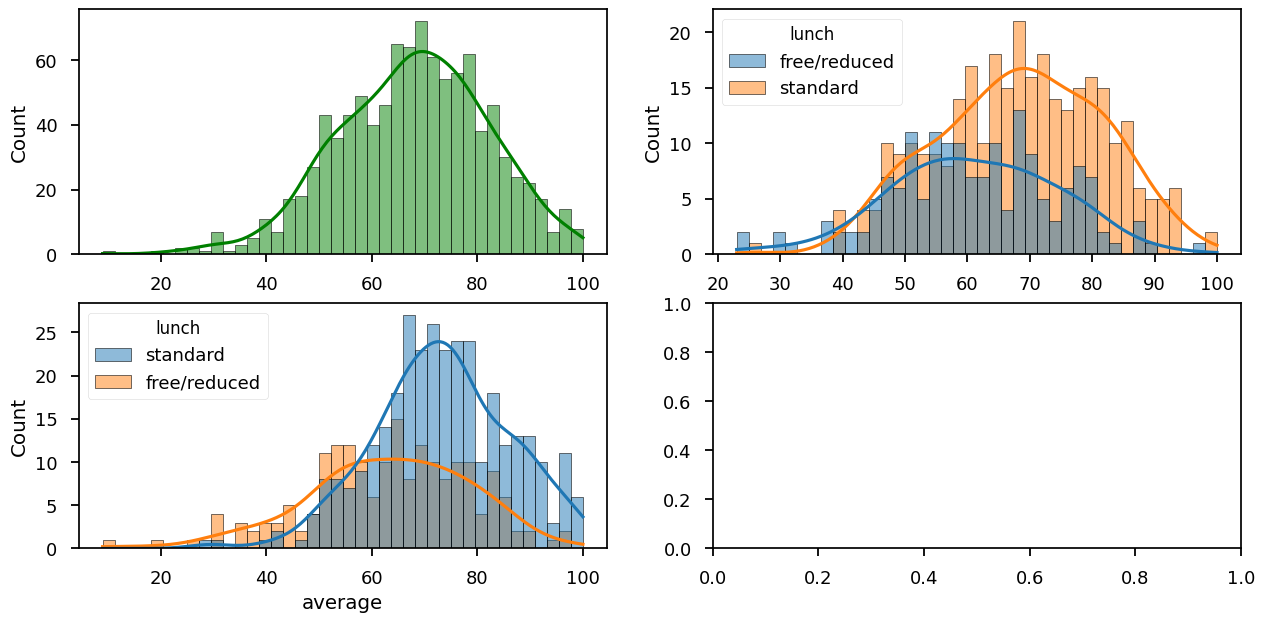

In [160]:
plt.subplots(2,2, figsize=(15, 7))
plt.subplot(2,2,1)
sns.histplot(data=df, x='average', bins=40, kde=True, color='g')
plt.subplot(2,2,2)
sns.histplot(data=df[df['gender'] == 'male'],  x='average',bins=40, kde=True, hue='lunch', color='g')
plt.subplot(2,2,3)
sns.histplot(data=df[df['gender'] == 'female'], x='average', bins=40, kde=True, hue='lunch', color='g')


- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.


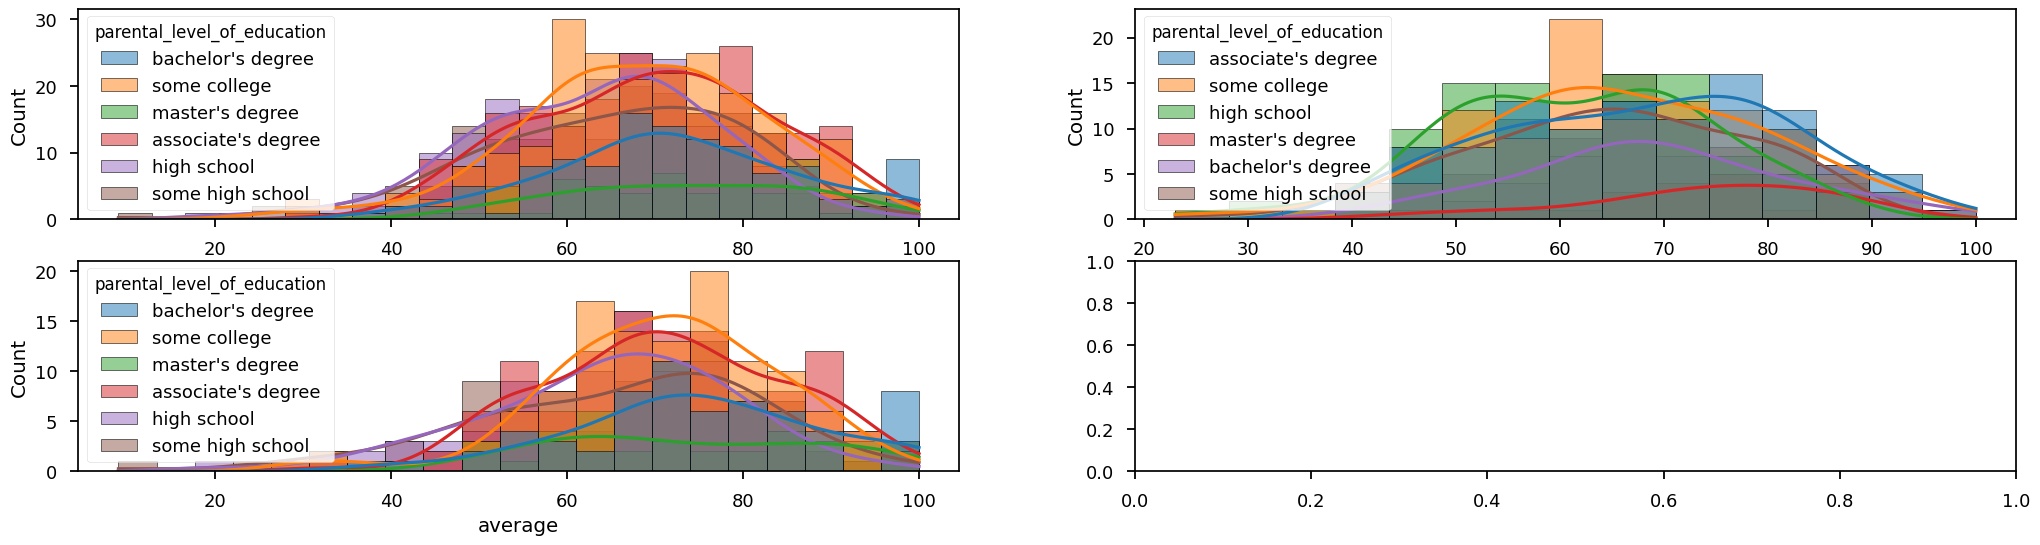

In [161]:
plt.subplots(2,2,figsize=(25,6))
plt.subplot(2,2,1)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(2,2,2)
ax =sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(2,2,3)
ax =sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()


- In general parent's education don't help student perform well in exam.

In [162]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


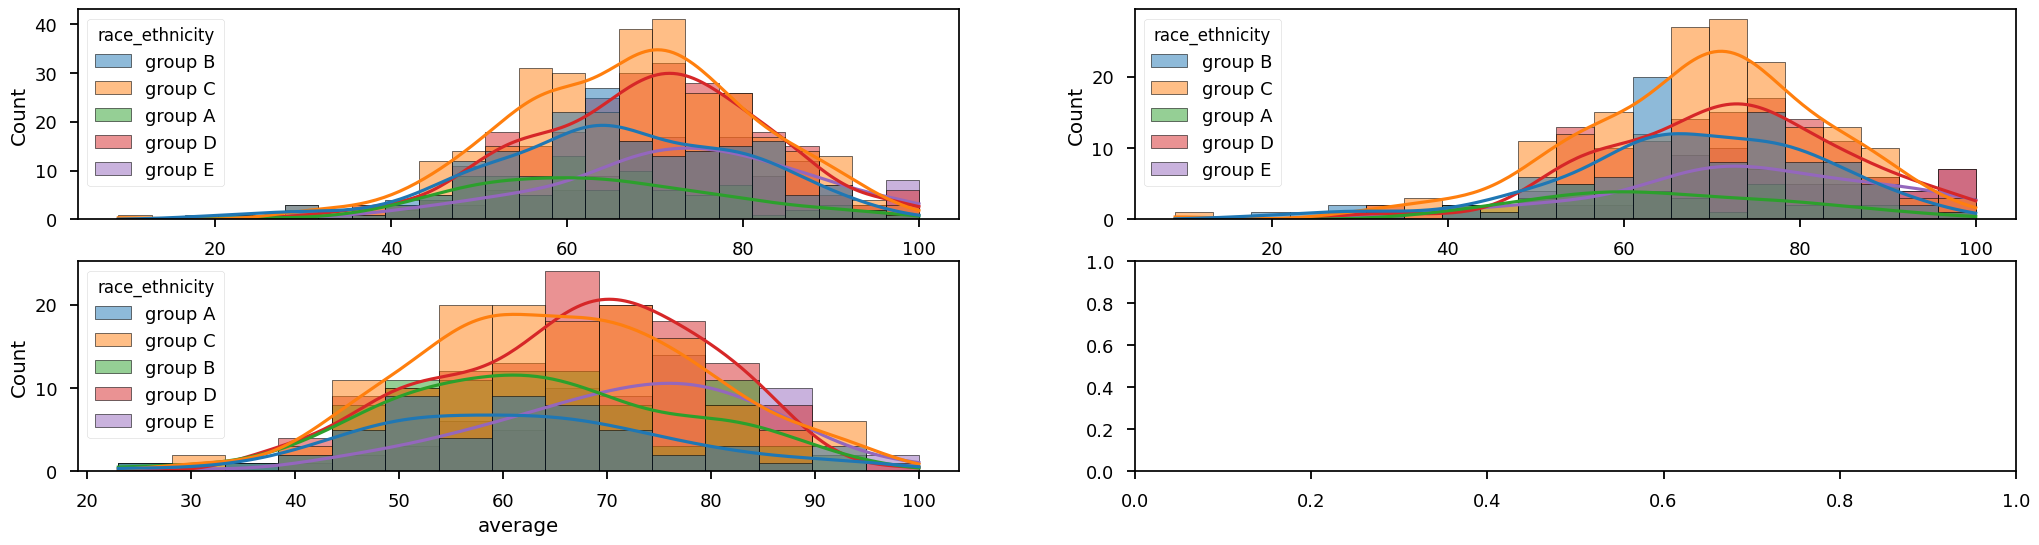

In [163]:
plt.subplots(2,2,figsize=(25,6))
plt.subplot(2,2,1)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(2,2,2)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(2,2,3)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


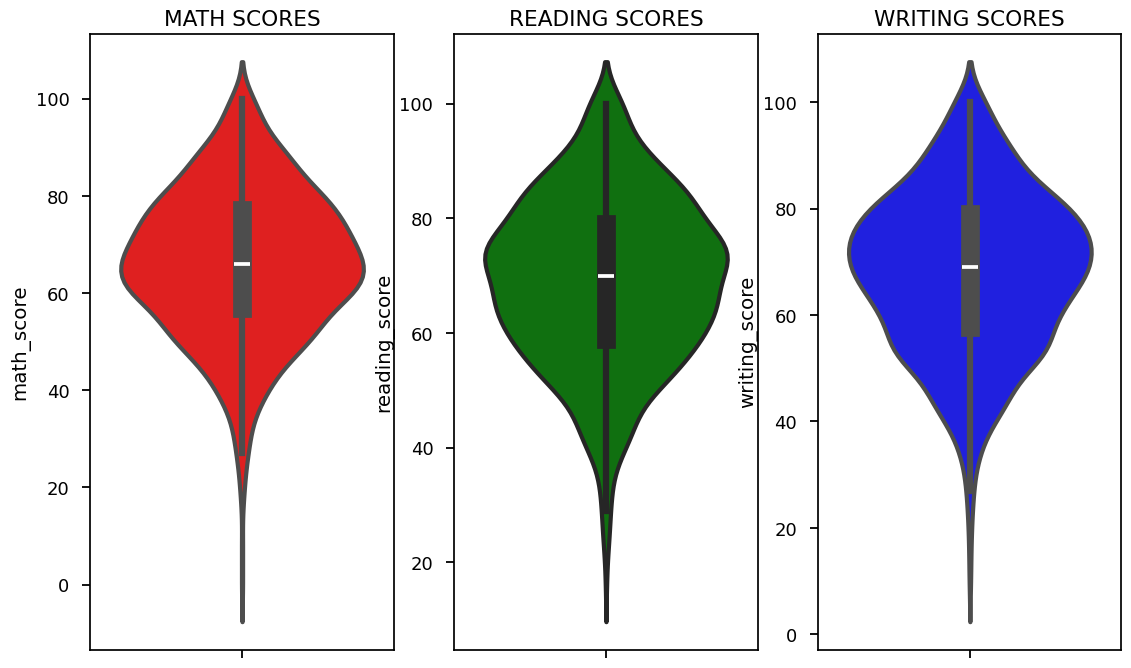

In [164]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

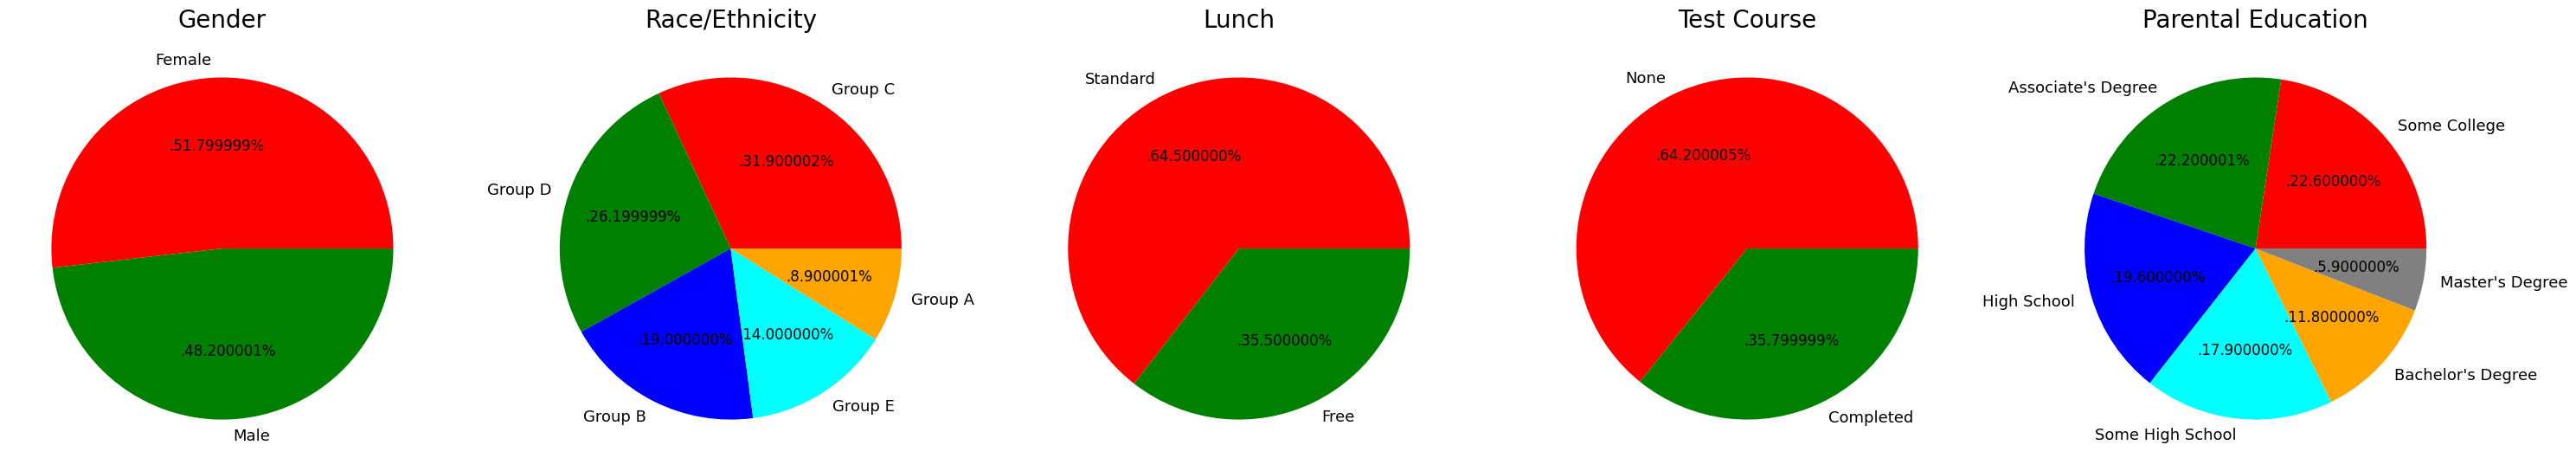

In [165]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Female students is almost equal
- Number students are greatest in Group C and slightly greater then D (~4.11)
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

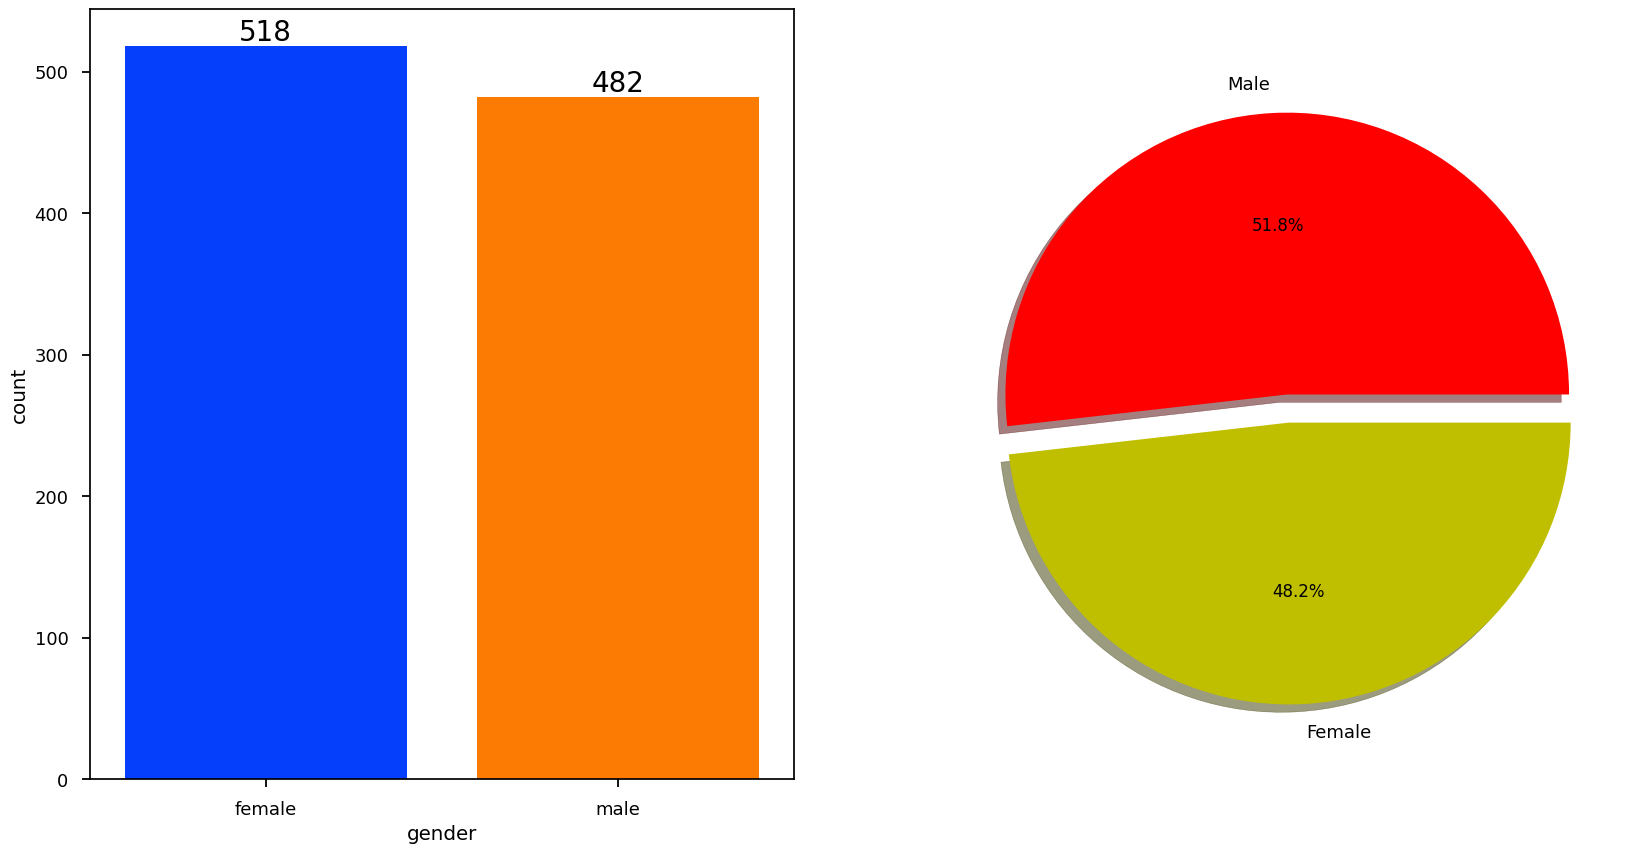

In [166]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.98)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['r','y'])
plt.show()

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

<Axes: xlabel='lunch', ylabel='writing_score'>

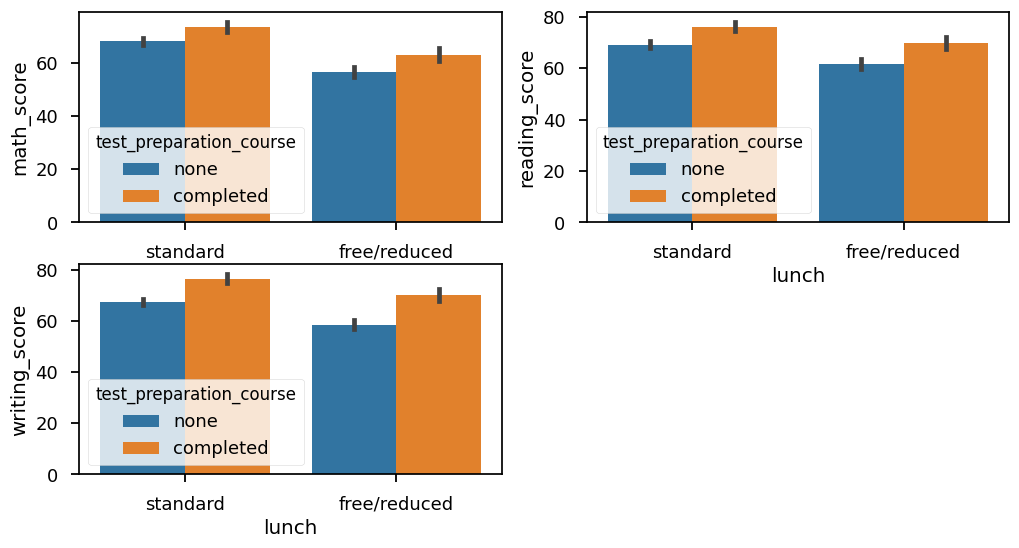

In [167]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

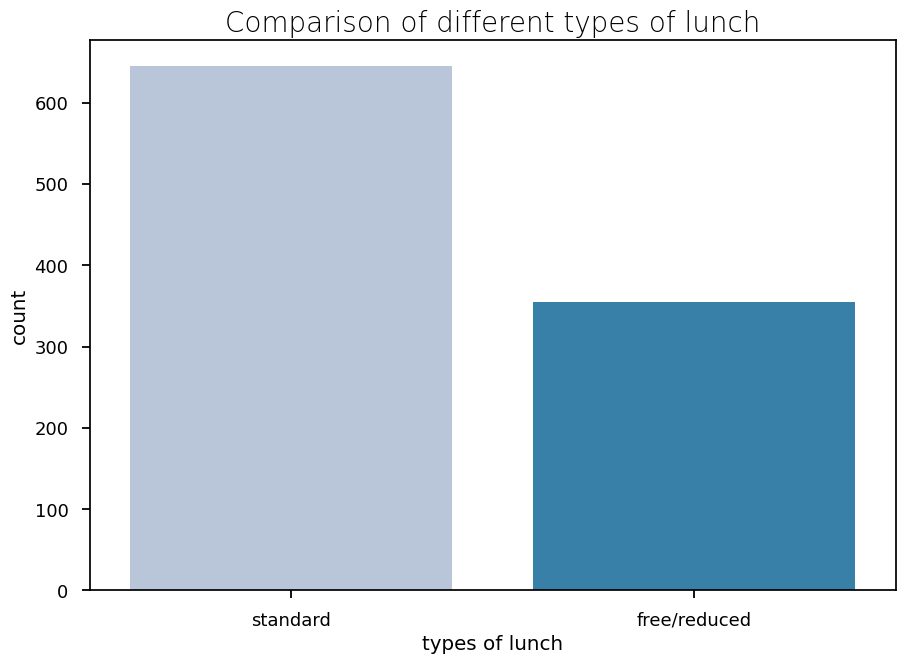

In [168]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Standard lunch are mostly served

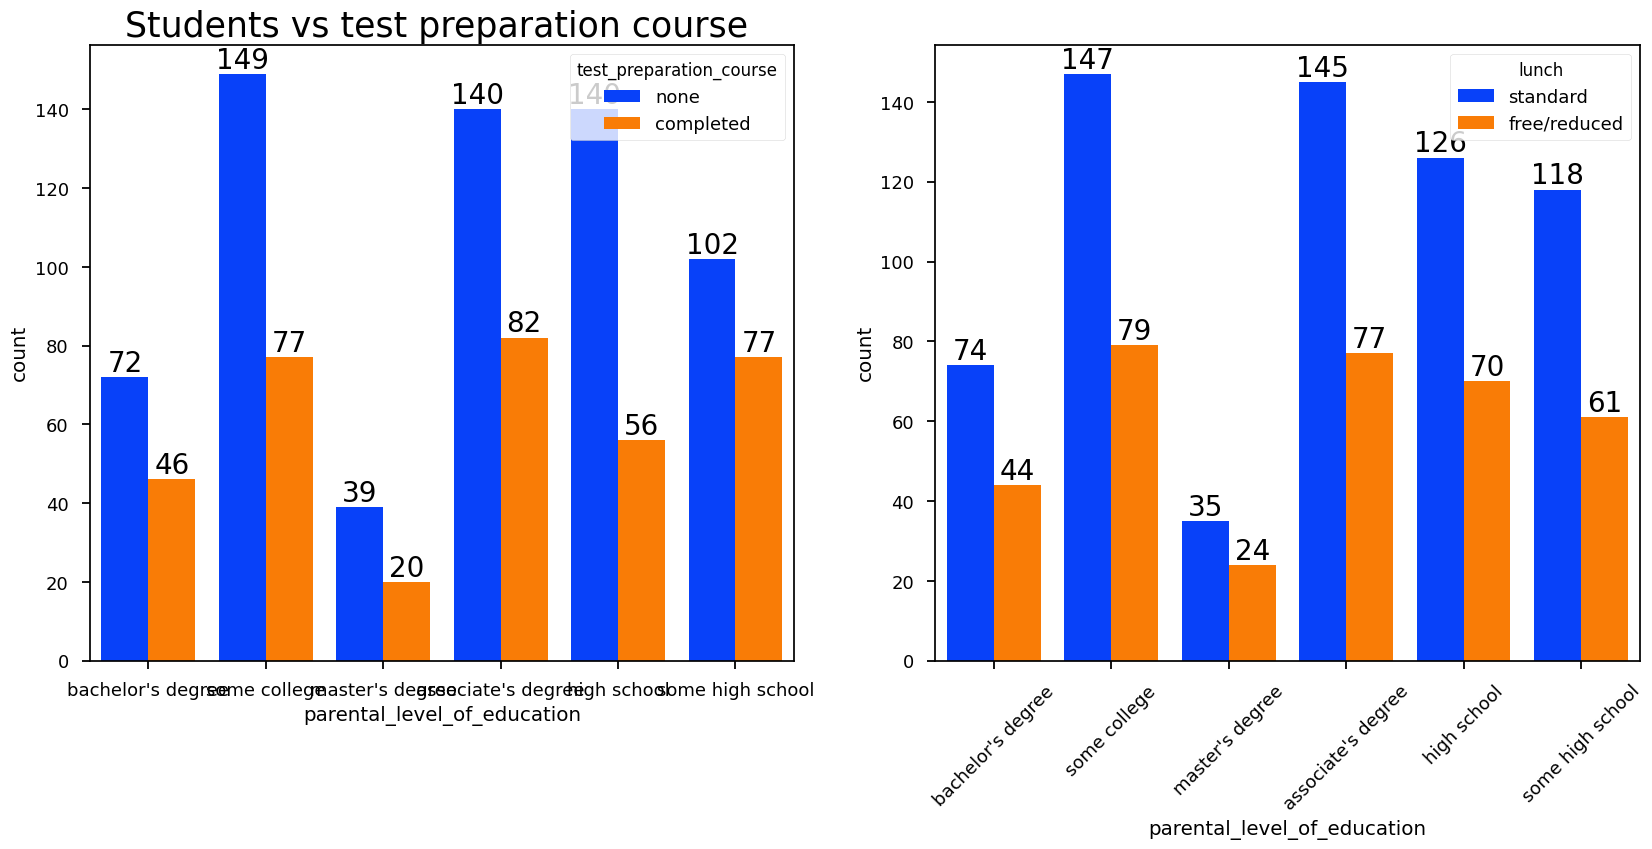

In [169]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
plt.xticks(rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
plt.xticks(rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)



## Outliers !

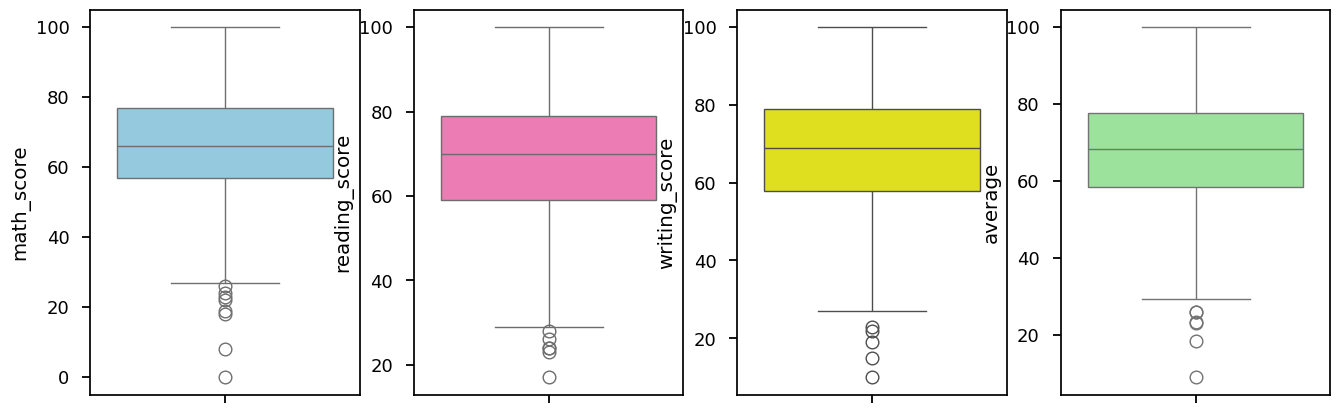

In [170]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## Mutivariate analysis using pairplot

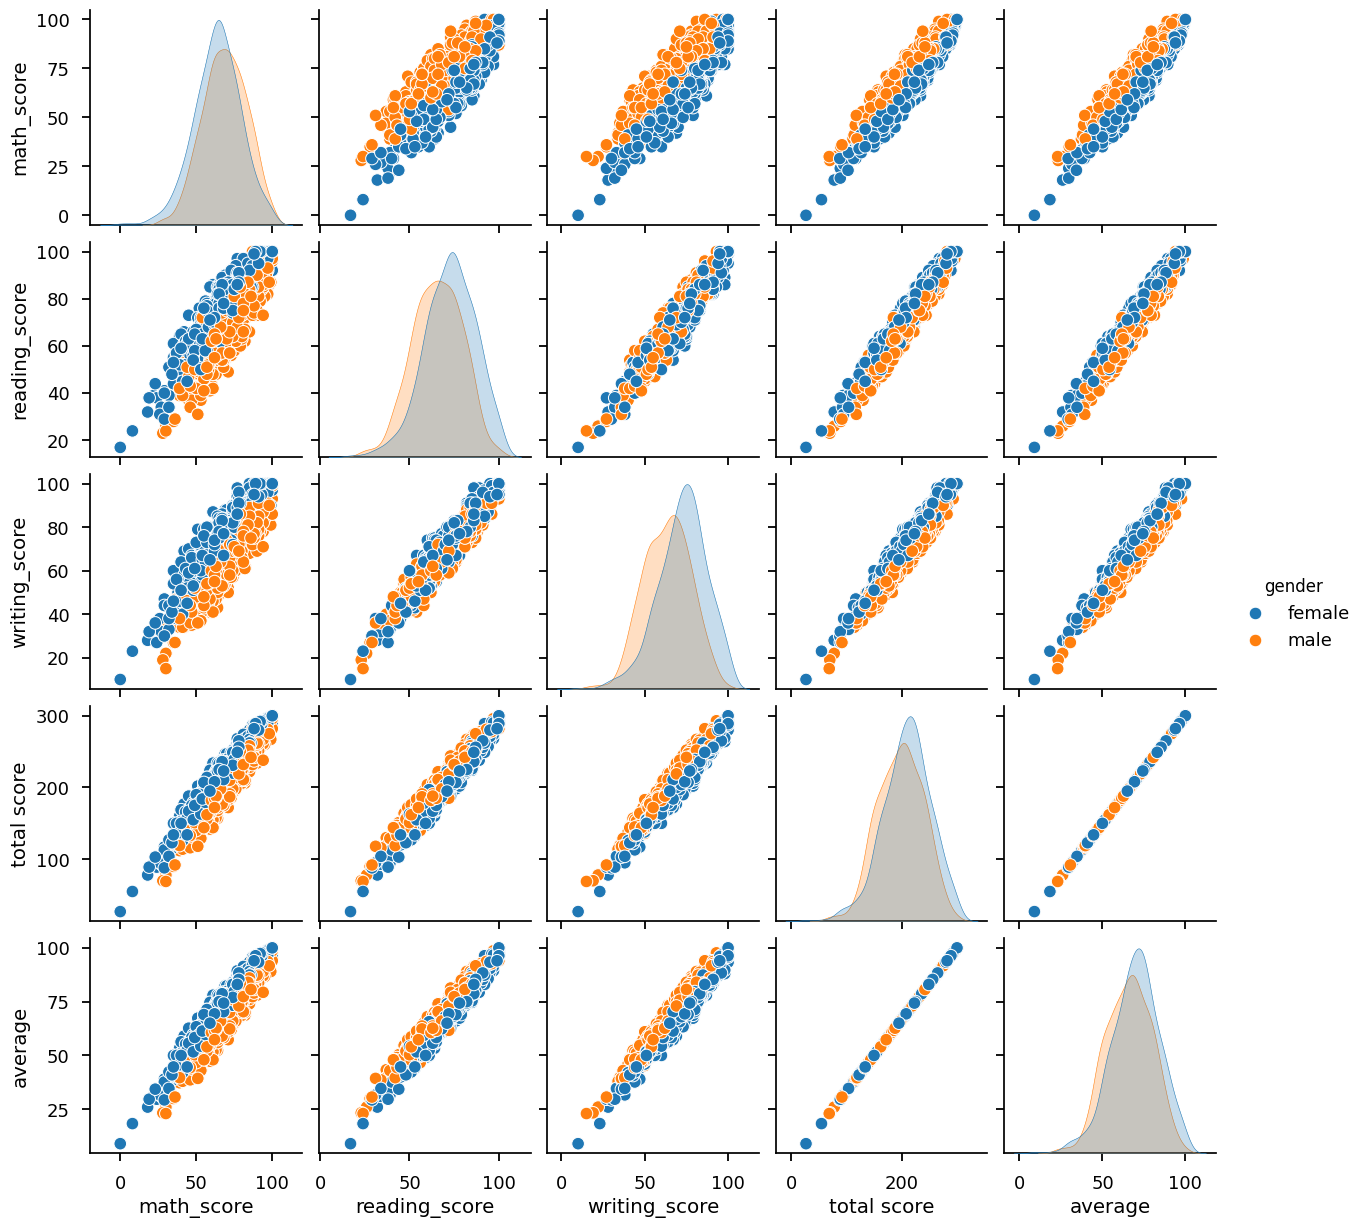

In [171]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Conclusions !

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.